# Carson Moore Project 1

In [20]:
# Dependencies and Setup
import pandas as pd
from pathlib import Path
import numpy as np

# File to Load (Remember to Change These)
school_eqao = Path("Resources/eqao_data.csv")
tdsb_loc = Path("Resources/tdsb_schools.csv")
tcdsb_loc = Path("Resources/tcdsb_schools.csv")
wb_loc = Path("Resources/wellbeing_data.csv")
#student_data_to_load = Path("Resources/students_complete.csv")

# read school data from files
school_perf = pd.read_csv(school_eqao)
tdsb_data = pd.read_csv(tdsb_loc)
tcdsb_data = pd.read_csv(tcdsb_loc)
wb_data = pd.read_csv(wb_loc)

#join tdsb and tcdsb datas for schools within region - unfortunately have no data on private schooling
school_data = tdsb_data.merge(tcdsb_data,how='outer')

#data cleaning - replace abbreviations for matching, replace toronto with old city for coherence with group standard
#Issue - There is no "Downtown" data and I cannot create such without extensive GIS usage which is untimely for this project
school_perf['School'] = school_perf['School'].str.replace('CI','Collegiate Institute')
school_perf['School'] = school_perf['School'].str.replace('SS','Secondary School')

#data cleaning - clean redundant columns, clean unused cities, clear N/As
school_data= school_data[['SCH_NAME','CITY','MET_PANEL_ID']]
school_data = school_data.loc[school_data['CITY'].isin(['Etobicoke','North York','East York','Toronto','York','Scarborough'])]
school_perf.dropna(inplace=True)
school_perf = school_perf.loc[school_perf['Board'].isin(['Toronto DSB'])]
school_perf.drop(['School ID','Board','Board ID','Num F','Num M'], axis=1,inplace=True)

Clean EQAO School Data

In [22]:
school_joined = school_perf.merge(school_data,how='inner',right_on='SCH_NAME',left_on='School')
school_joined.head()

,School,Num students,Level 1 (%),Level 2 (%),Level 3 (%),Level 4 (%),Num responses,SCH_NAME,CITY,MET_PANEL_ID
0,Birchmount Park Collegiate Institute,127.0,6.0,23.0,66.0,2.0,116.0,Birchmount Park Collegiate Institute,Scarborough,S
1,C W Jefferys Collegiate Institute,109.0,17.0,23.0,50.0,7.0,101.0,C W Jefferys Collegiate Institute,North York,S
2,Rosedale Heights School of the Arts,185.0,6.0,12.0,76.0,4.0,172.0,Rosedale Heights School of the Arts,Toronto,S
3,Cedarbrae Collegiate Institute,206.0,15.0,21.0,57.0,5.0,181.0,Cedarbrae Collegiate Institute,Scarborough,S
4,Earl Haig Secondary School,385.0,2.0,5.0,67.0,26.0,364.0,Earl Haig Secondary School,North York,S


Analyse EQAO Data

In [142]:
countlvl = school_joined[['SCH_NAME','CITY']].groupby(['CITY'],sort=False).count()
lvl1 = school_joined[['CITY','Level 1 (%)']].groupby(['CITY']).mean(numeric_only=True)
lvl2 = school_joined[['CITY','Level 2 (%)']].groupby(['CITY']).mean(numeric_only=True)
lvl3 = school_joined[['CITY','Level 3 (%)']].groupby(['CITY']).mean(numeric_only=True)
lvl4 = school_joined[['CITY','Level 4 (%)']].groupby(['CITY']).mean(numeric_only=True)

lvl_agg = pd.concat([countlvl,lvl1,lvl2,lvl3,lvl4],axis=1,sort=True)
lvl_agg.columns.values[0]='Schools'
lvl_agg

,Schools,Level 1 (%),Level 2 (%),Level 3 (%),Level 4 (%)
CITY,,,,,
East York,2,5.500000,15.000000,65.000000,11.500000
Etobicoke,7,3.000000,8.285714,77.428571,10.571429
North York,5,7.000000,10.600000,60.600000,19.600000
Scarborough,6,6.833333,15.166667,69.333333,6.833333
Toronto,12,4.250000,9.750000,72.666667,12.166667
York,2,14.500000,13.000000,63.000000,7.000000


Clean Wellbeing Data

In [136]:
wb_data
district_bins = [0, 22, 54, 64, 106, 116, 141]
labels = ["Etobicoke", "North York", "East York", "Toronto","York","Scarborough"]
wb_data['District'] = pd.cut(pd.to_numeric(wb_data['Neighbourhood Id']),bins=district_bins,labels=labels)
wb_data['Catholic School Graduation'] = wb_data['Catholic School Graduation']*100
wb_data

,Neighbourhood,Neighbourhood Id,Catholic School Graduation,Catholic School Literacy,Catholic University Applicants,Early Development Instrument,Library Activity,Library Open Hours,Library Program Attendance,Library Programs,Library Space,District
0,West Humber-Clairville,1,81.0055,68.518516,33.110366,50,1,4,2,3,2,Etobicoke
1,Mount Olive-Silverstone-Jamestown,2,79.2899,59.200000,19.122257,50,5,8,7,6,6,Etobicoke
2,Thistletown-Beaumond Heights,3,73.0000,68.888885,33.116882,100,5,9,6,6,6,Etobicoke
3,Rexdale-Kipling,4,86.4197,74.074073,32.330825,50,5,9,6,6,6,Etobicoke
4,Elms-Old Rexdale,5,65.3333,59.200000,28.695652,50,1,4,1,2,2,Etobicoke
...,...,...,...,...,...,...,...,...,...,...,...,...
135,West Hill,136,86.5030,80.213905,38.425926,50,2,4,2,2,3,Scarborough
136,Woburn,137,82.9999,78.787879,37.049179,50,5,7,6,6,5,Scarborough
137,Eglinton East,138,83.3333,72.727272,42.424243,100,2,4,2,3,2,Scarborough
138,Scarborough Village,139,78.8461,76.190475,32.258064,50,4,7,5,6,5,Scarborough


Analyse Wellbeing Data

In [141]:
wb_grad = wb_data[['District','Catholic School Graduation']].groupby(['District'],sort=False).mean(numeric_only=True)
wb_grad = wb_grad['Catholic School Graduation']
wb_lit = wb_data[['District','Catholic School Literacy']].groupby(['District'],sort=False).mean(numeric_only=True)
wb_lit = wb_lit['Catholic School Literacy']
wb_uni = wb_data[['District','Catholic University Applicants']].groupby(['District'],sort=False).mean(numeric_only=True)
wb_uni = wb_uni['Catholic University Applicants']
wb_count = wb_data[['District','Neighbourhood']].groupby(['District'],sort=False).count()

wb_agg = pd.concat([wb_grad,wb_lit,wb_uni,wb_count],axis=1,sort=True)
wb_agg.columns.values[0]='Graduation Rate (%)'
wb_agg.columns.values[1]='Literacy Rate (%)'
wb_agg.columns.values[2]='University Applicants (%)'
wb_agg.columns.values[3]='Schools'
wb_agg.sort_values('District')
wb_agg

,Graduation Rate (%),Literacy Rate (%),University Applicants (%),Schools
District,,,,
Etobicoke,85.819277,80.355451,47.221874,22
North York,83.791703,79.261726,46.840927,32
East York,77.553190,78.911309,39.114863,10
Toronto,76.426907,71.915110,37.842177,42
York,81.624720,70.648951,33.680589,10
Scarborough,84.391067,81.720142,42.075426,24


Create Graphs

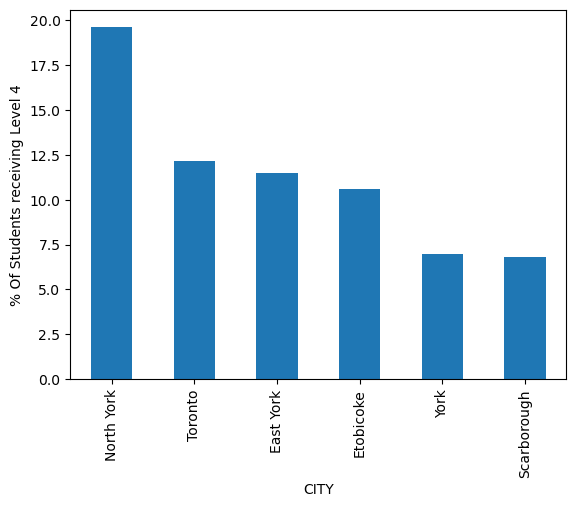

In [134]:
lvl4.sort_values('Level 4 (%)',ascending=False).plot(kind="bar",legend=False,ylabel='% Of Students receiving Level 4').get_figure().savefig('Charts/Cities by % Lvl4')

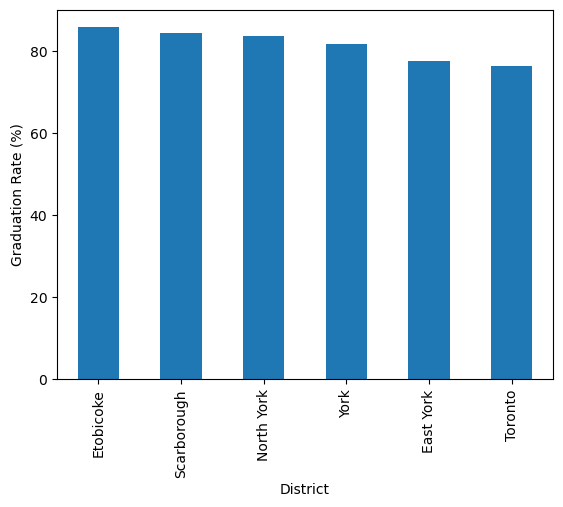

In [135]:
wb_agg['Graduation Rate (%)'].sort_values(ascending=False).plot(kind="bar",legend=False,ylabel='Graduation Rate (%)').get_figure().savefig('Charts/TCDSB Graduation Rate')

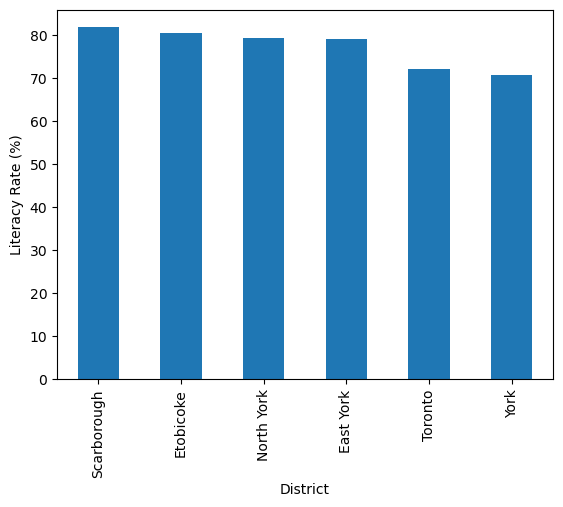

In [123]:
wb_agg['Literacy Rate (%)'].sort_values(ascending=False).plot(kind="bar",legend=False,ylabel='Literacy Rate (%)').get_figure().savefig('Charts/TCDSB Literacy Test')

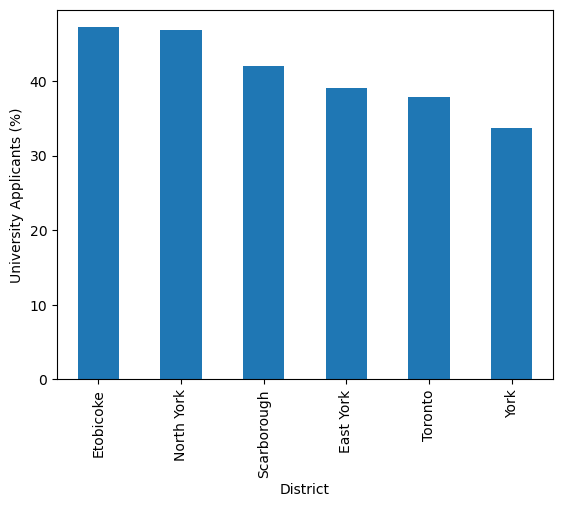

In [122]:
wb_agg['University Applicants (%)'].sort_values(ascending=False).plot(kind="bar",legend=False,ylabel='University Applicants (%)').get_figure().savefig('Charts/TCDSB Uni App')

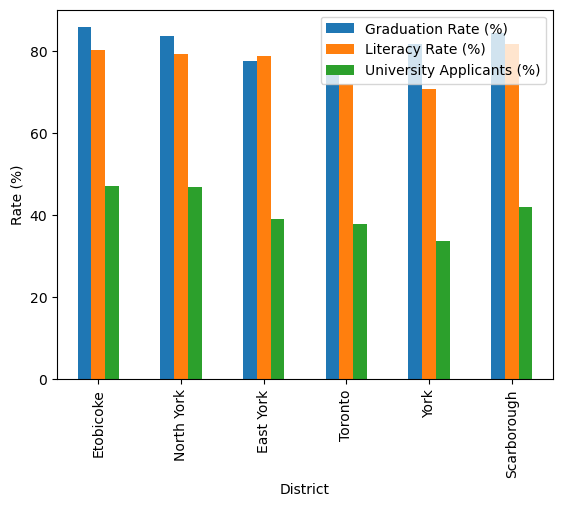

In [130]:
wb_agg.plot(kind="bar",ylabel='Rate (%)').get_figure().savefig('Charts/TCDSB Data')